In [1]:
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="*",
  database="solarschema"
#   auth_plugin='mysql_native_password'
)

# print(mydb) 

In [2]:
mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('demohousehold',)
('demoracelatino',)
('demorelationships',)
('demosexage',)
('income',)
('solar',)


In [82]:
mycursor.execute("""
select * 
from solar s
join demohousehold dh on s.region_name = dh.`GEO.id2`
join demoracelatino dra on s.region_name = dra.`GEO.id2`
join demorelationships dre on s.region_name = dre.`GEO.id2`
join demosexage ds on s.region_name = ds.`GEO.id2`
join income i on s.region_name = i.ZIPCODE
WHERE s.count_qualified > 25
""")

myresult = mycursor.fetchall()

zips = list()
for x in myresult:
    zips.append(x[0])
    
print(len(zips))

9927


In [83]:
# mydb
query = pd.read_sql_query("""
select * from solar s
join demohousehold dh on s.region_name = dh.`GEO.id2`
join demoracelatino dra on s.region_name = dra.`GEO.id2`
join demorelationships dre on s.region_name = dre.`GEO.id2`
join demosexage ds on s.region_name = ds.`GEO.id2`
join income i on s.region_name = i.ZIPCODE
WHERE s.count_qualified > 25
""", mydb)

In [84]:
df = pd.DataFrame(query)

In [85]:
# zip codes, attributes per zip code
df.shape

(9927, 427)

In [86]:
for col in df.columns:
    print(col)

region_name
state_name
lat_max
lat_min
lng_max
lng_min
lat_avg
lng_avg
yearly_sunlight_kwh_kw_threshold_avg
count_qualified
percent_covered
percent_qualified
number_of_panels_n
number_of_panels_s
number_of_panels_e
number_of_panels_w
number_of_panels_f
number_of_panels_median
number_of_panels_total
kw_median
kw_total
yearly_sunlight_kwh_n
yearly_sunlight_kwh_s
yearly_sunlight_kwh_e
yearly_sunlight_kwh_w
yearly_sunlight_kwh_f
yearly_sunlight_kwh_median
yearly_sunlight_kwh_total
install_size_kw_buckets
carbon_offset_metric_tons
existing_installs_count
center_point
GEO.id
GEO.id2
GEO.display-label
HD01_S150
HD02_S150
HD01_S151
HD02_S151
HD01_S152
HD02_S152
HD01_S153
HD02_S153
HD01_S154
HD02_S154
HD01_S155
HD02_S155
HD01_S156
HD02_S156
HD01_S157
HD02_S157
HD01_S158
HD02_S158
HD01_S159
HD02_S159
HD01_S160
HD02_S160
HD01_S161
HD02_S161
HD01_S162
HD02_S162
HD01_S163
HD02_S163
HD01_S164
HD02_S164
HD01_S165
HD02_S165
HD01_S166
HD02_S166
HD01_S167
HD02_S167
HD01_S168
HD02_S168
HD01_S169
HD02_S16

In [87]:
df.head

In [88]:
adjusted_gross_income = df[['region_name','A00100', 'existing_installs_count', 'count_qualified', 'kw_total']].dropna(0)

In [89]:
adjusted_gross_income['curr_production'] = adjusted_gross_income['kw_total'] * adjusted_gross_income['existing_installs_count'] / adjusted_gross_income['count_qualified']

adjusted_gross_income['log_earning'] = np.sqrt(adjusted_gross_income['A00100'])
adjusted_gross_income['log_prod'] = np.sqrt(adjusted_gross_income['curr_production'])

In [90]:
# adjusted_gross_income = adjusted_gross_income[adjusted_gross_income['A00100'] < 500000]

adjusted_gross_income = adjusted_gross_income.sort_values('curr_production', ascending=False).dropna(0)

In [91]:
lr = LinearRegression()

X = adjusted_gross_income['log_earning'].values.reshape(-1, 1) # turns them to np.ndarrays
Y = adjusted_gross_income['log_prod'].values.reshape(-1, 1)

lr.fit(X, Y)
y_pred = lr.predict(X)
y_pred

array([[30.63127521],
       [42.02004946],
       [46.65142257],
       ...,
       [11.01135117],
       [16.84735503],
       [16.79065669]])

22.65563186625562


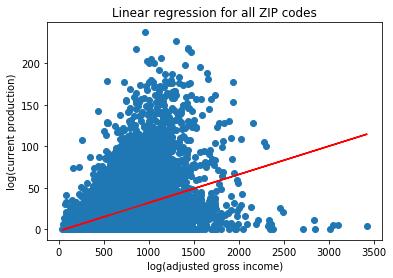

[-2.22737528] [[0.0341312]]


In [92]:
print(Y.mean())

plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

plt.xlabel('log(adjusted gross income)')
plt.ylabel('log(current production)')
plt.title('Linear regression for all ZIP codes')


plt.savefig('linear_reg_all_states.png')
plt.show()



print(lr.intercept_, lr.coef_)

In [36]:
print(lr.score(X, Y), 1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))


0.15189249925075343 0.15180704761339836


In [72]:
ca_zips = ["96161",
"96087",
"96073",
"96062",
"96019",
"96008",
"96007",
"96003",
"96002",
"96001",
"95993",
"95991",
"95982",
"95973",
"95968",
"95966",
"95965",
"95961",
"95959",
"95953",
"95949",
"95945",
"95938",
"95928",
"95926",
"95917",
"95901",
"95864",
"95843",
"95842",
"95841",
"95838",
"95837",
"95835",
"95834",
"95833",
"95832",
"95831",
"95830",
"95829",
"95828",
"95827",
"95826",
"95825",
"95824",
"95823",
"95822",
"95821",
"95820",
"95819",
"95818",
"95817",
"95816",
"95815",
"95814",
"95811",
"95776",
"95765",
"95762",
"95758",
"95757",
"95747",
"95746",
"95742",
"95722",
"95713",
"95703",
"95695",
"95691",
"95688",
"95687",
"95683",
"95682",
"95678",
"95677",
"95673",
"95672",
"95670",
"95667",
"95663",
"95662",
"95661",
"95660",
"95658",
"95655",
"95652",
"95650",
"95648",
"95630",
"95628",
"95626",
"95624",
"95623",
"95621",
"95620",
"95619",
"95618",
"95616",
"95612",
"95610",
"95608",
"95605",
"95603",
"95602",
"95564",
"95537",
"95521",
"95519",
"95503",
"95501",
"95492",
"95482",
"95476",
"95472",
"95470",
"95452",
"95448",
"95444",
"95442",
"95441",
"95439",
"95436",
"95409",
"95407",
"95405",
"95404",
"95403",
"95401",
"95389",
"95388",
"95382",
"95381",
"95380",
"95368",
"95367",
"95366",
"95361",
"95358",
"95357",
"95356",
"95355",
"95354",
"95351",
"95350",
"95348",
"95343",
"95341",
"95340",
"95337",
"95336",
"95330",
"95328",
"95326",
"95322",
"95320",
"95316",
"95307",
"95301",
"95258",
"95242",
"95240",
"95231",
"95220",
"95219",
"95215",
"95212",
"95211",
"95210",
"95209",
"95207",
"95206",
"95205",
"95204",
"95203",
"95202",
"95190",
"95148",
"95141",
"95140",
"95139",
"95138",
"95136",
"95135",
"95134",
"95133",
"95132",
"95131",
"95130",
"95129",
"95128",
"95127",
"95126",
"95125",
"95124",
"95123",
"95122",
"95121",
"95120",
"95119",
"95118",
"95117",
"95116",
"95113",
"95112",
"95111",
"95110",
"95076",
"95073",
"95070",
"95066",
"95065",
"95064",
"95062",
"95060",
"95054",
"95053",
"95051",
"95050",
"95043",
"95039",
"95037",
"95035",
"95033",
"95032",
"95030",
"95023",
"95020",
"95019",
"95018",
"95014",
"95013",
"95012",
"95010",
"95008",
"95006",
"95005",
"95003",
"95002",
"94965",
"94964",
"94960",
"94957",
"94954",
"94952",
"94951",
"94949",
"94947",
"94945",
"94941",
"94939",
"94931",
"94930",
"94928",
"94925",
"94920",
"94904",
"94903",
"94901",
"94806",
"94805",
"94804",
"94803",
"94801",
"94720",
"94710",
"94709",
"94708",
"94707",
"94706",
"94705",
"94704",
"94703",
"94702",
"94621",
"94619",
"94618",
"94613",
"94612",
"94611",
"94610",
"94609",
"94608",
"94607",
"94606",
"94605",
"94603",
"94602",
"94601",
"94599",
"94598",
"94597",
"94596",
"94595",
"94592",
"94591",
"94590",
"94589",
"94588",
"94587",
"94585",
"94583",
"94582",
"94580",
"94579",
"94578",
"94577",
"94576",
"94574",
"94573",
"94572",
"94569",
"94568",
"94566",
"94565",
"94564",
"94563",
"94561",
"94560",
"94559",
"94558",
"94556",
"94555",
"94553",
"94552",
"94551",
"94550",
"94549",
"94547",
"94546",
"94545",
"94544",
"94542",
"94541",
"94539",
"94538",
"94536",
"94535",
"94534",
"94533",
"94531",
"94530",
"94526",
"94525",
"94523",
"94521",
"94520",
"94519",
"94518",
"94517",
"94516",
"94515",
"94513",
"94510",
"94509",
"94508",
"94507",
"94506",
"94505",
"94503",
"94502",
"94501",
"94497",
"94404",
"94403",
"94402",
"94401",
"94306",
"94305",
"94304",
"94303",
"94301",
"94158",
"94134",
"94133",
"94132",
"94131",
"94130",
"94129",
"94128",
"94127",
"94124",
"94123",
"94122",
"94121",
"94118",
"94117",
"94116",
"94115",
"94114",
"94112",
"94111",
"94110",
"94109",
"94108",
"94107",
"94105",
"94104",
"94103",
"94102",
"94089",
"94087",
"94086",
"94085",
"94080",
"94070",
"94066",
"94065",
"94063",
"94062",
"94061",
"94044",
"94043",
"94041",
"94040",
"94038",
"94037",
"94030",
"94028",
"94027",
"94025",
"94024",
"94022",
"94019",
"94015",
"94014",
"94010",
"94005",
"94002",
"93955",
"93953",
"93950",
"93944",
"93943",
"93940",
"93933",
"93924",
"93923",
"93908",
"93907",
"93906",
"93905",
"93901",
"93888",
"93740",
"93737",
"93730",
"93728",
"93727",
"93726",
"93725",
"93723",
"93722",
"93721",
"93720",
"93711",
"93710",
"93706",
"93705",
"93704",
"93703",
"93702",
"93701",
"93662",
"93657",
"93654",
"93650",
"93648",
"93638",
"93637",
"93636",
"93635",
"93631",
"93625",
"93619",
"93618",
"93616",
"93612",
"93611",
"93599",
"93552",
"93551",
"93550",
"93543",
"93536",
"93535",
"93534",
"93465",
"93458",
"93455",
"93454",
"93449",
"93446",
"93445",
"93444",
"93433",
"93424",
"93422",
"93420",
"93410",
"93407",
"93405",
"93401",
"93314",
"93313",
"93312",
"93311",
"93309",
"93308",
"93307",
"93306",
"93305",
"93304",
"93301",
"93292",
"93291",
"93277",
"93274",
"93267",
"93257",
"93250",
"93247",
"93245",
"93235",
"93230",
"93223",
"93221",
"93215",
"93202",
"93117",
"93111",
"93110",
"93109",
"93108",
"93105",
"93103",
"93101",
"93067",
"93066",
"93065",
"93064",
"93063",
"93060",
"93043",
"93042",
"93041",
"93036",
"93035",
"93033",
"93030",
"93023",
"93022",
"93021",
"93013",
"93012",
"93010",
"93004",
"93003",
"93001",
"92887",
"92886",
"92883",
"92882",
"92881",
"92880",
"92879",
"92870",
"92869",
"92868",
"92867",
"92866",
"92865",
"92861",
"92860",
"92845",
"92844",
"92843",
"92841",
"92840",
"92835",
"92833",
"92832",
"92831",
"92823",
"92821",
"92808",
"92807",
"92806",
"92805",
"92804",
"92802",
"92801",
"92782",
"92780",
"92708",
"92707",
"92706",
"92705",
"92704",
"92703",
"92701",
"92697",
"92694",
"92692",
"92691",
"92688",
"92683",
"92679",
"92677",
"92676",
"92675",
"92673",
"92672",
"92663",
"92662",
"92661",
"92660",
"92657",
"92656",
"92655",
"92653",
"92651",
"92649",
"92648",
"92647",
"92646",
"92637",
"92630",
"92629",
"92627",
"92626",
"92625",
"92624",
"92620",
"92618",
"92617",
"92614",
"92612",
"92610",
"92606",
"92604",
"92603",
"92602",
"92596",
"92595",
"92592",
"92591",
"92590",
"92587",
"92586",
"92585",
"92584",
"92583",
"92582",
"92571",
"92570",
"92567",
"92563",
"92562",
"92557",
"92555",
"92553",
"92551",
"92548",
"92545",
"92544",
"92543",
"92532",
"92530",
"92518",
"92509",
"92508",
"92507",
"92506",
"92505",
"92504",
"92503",
"92501",
"92415",
"92411",
"92410",
"92408",
"92407",
"92405",
"92404",
"92401",
"92399",
"92395",
"92394",
"92392",
"92391",
"92386",
"92378",
"92377",
"92376",
"92374",
"92373",
"92363",
"92359",
"92354",
"92352",
"92350",
"92346",
"92345",
"92344",
"92342",
"92337",
"92336",
"92335",
"92333",
"92325",
"92324",
"92321",
"92320",
"92316",
"92315",
"92314",
"92313",
"92311",
"92308",
"92307",
"92301",
"92283",
"92277",
"92276",
"92274",
"92270",
"92264",
"92262",
"92260",
"92253",
"92251",
"92243",
"92240",
"92236",
"92234",
"92231",
"92223",
"92220",
"92211",
"92210",
"92203",
"92201",
"92182",
"92179",
"92173",
"92161",
"92155",
"92154",
"92147",
"92145",
"92140",
"92139",
"92136",
"92134",
"92131",
"92130",
"92129",
"92128",
"92127",
"92126",
"92124",
"92123",
"92122",
"92121",
"92120",
"92119",
"92118",
"92117",
"92116",
"92115",
"92114",
"92113",
"92111",
"92110",
"92109",
"92108",
"92107",
"92106",
"92105",
"92104",
"92103",
"92102",
"92101",
"92096",
"92093",
"92091",
"92084",
"92083",
"92082",
"92081",
"92078",
"92075",
"92071",
"92069",
"92067",
"92064",
"92059",
"92058",
"92057",
"92056",
"92054",
"92040",
"92037",
"92029",
"92028",
"92027",
"92026",
"92025",
"92024",
"92021",
"92020",
"92019",
"92014",
"92011",
"92010",
"92009",
"92008",
"92007",
"92003",
"91978",
"91977",
"91950",
"91945",
"91942",
"91941",
"91935",
"91932",
"91915",
"91914",
"91913",
"91911",
"91910",
"91902",
"91803",
"91801",
"91792",
"91791",
"91790",
"91789",
"91786",
"91784",
"91780",
"91776",
"91775",
"91773",
"91770",
"91768",
"91767",
"91766",
"91765",
"91764",
"91763",
"91762",
"91761",
"91755",
"91754",
"91752",
"91750",
"91748",
"91746",
"91745",
"91744",
"91741",
"91740",
"91739",
"91737",
"91733",
"91732",
"91731",
"91730",
"91724",
"91723",
"91722",
"91711",
"91710",
"91709",
"91708",
"91706",
"91702",
"91701",
"91607",
"91606",
"91605",
"91604",
"91602",
"91601",
"91521",
"91506",
"91505",
"91504",
"91502",
"91501",
"91436",
"91423",
"91411",
"91406",
"91405",
"91403",
"91402",
"91401",
"91390",
"91387",
"91384",
"91381",
"91377",
"91371",
"91367",
"91364",
"91362",
"91361",
"91360",
"91356",
"91355",
"91354",
"91352",
"91351",
"91350",
"91345",
"91344",
"91343",
"91342",
"91340",
"91335",
"91331",
"91330",
"91326",
"91325",
"91324",
"91321",
"91320",
"91316",
"91311",
"91307",
"91306",
"91304",
"91303",
"91302",
"91301",
"91214",
"91208",
"91207",
"91206",
"91205",
"91204",
"91203",
"91202",
"91201",
"91125",
"91123",
"91108",
"91107",
"91106",
"91105",
"91104",
"91103",
"91101",
"91042",
"91040",
"91030",
"91024",
"91020",
"91016",
"91011",
"91010",
"91008",
"91007",
"91006",
"91001",
"90840",
"90822",
"90815",
"90814",
"90813",
"90810",
"90809",
"90808",
"90807",
"90806",
"90805",
"90804",
"90803",
"90802",
"90755",
"90746",
"90745",
"90744",
"90740",
"90732",
"90731",
"90723",
"90720",
"90717",
"90716",
"90715",
"90713",
"90712",
"90710",
"90706",
"90703",
"90701",
"90680",
"90670",
"90660",
"90650",
"90640",
"90638",
"90631",
"90630",
"90623",
"90621",
"90620",
"90606",
"90605",
"90604",
"90603",
"90602",
"90601",
"90506",
"90505",
"90504",
"90503",
"90502",
"90501",
"90405",
"90404",
"90403",
"90402",
"90401",
"90305",
"90304",
"90303",
"90302",
"90301",
"90293",
"90292",
"90291",
"90290",
"90280",
"90278",
"90277",
"90275",
"90274",
"90272",
"90270",
"90266",
"90265",
"90262",
"90260",
"90255",
"90254",
"90250",
"90249",
"90248",
"90247",
"90245",
"90242",
"90241",
"90240",
"90232",
"90230",
"90222",
"90221",
"90220",
"90212",
"90211",
"90210",
"90201",
"90095",
"90094",
"90089",
"90077",
"90069",
"90068",
"90067",
"90066",
"90065",
"90064",
"90063",
"90062",
"90061",
"90059",
"90058",
"90057",
"90056",
"90052",
"90049",
"90048",
"90047",
"90046",
"90045",
"90044",
"90043",
"90042",
"90041",
"90040",
"90039",
"90038",
"90037",
"90036",
"90035",
"90034",
"90033",
"90032",
"90031",
"90029",
"90028",
"90027",
"90026",
"90025",
"90024",
"90023",
"90022",
"90021",
"90020",
"90019",
"90018",
"90017",
"90016",
"90015",
"90014",
"90013",
"90012",
"90011",
"90010",
"90008",
"90007",
"90006",
"90005",
"90004",
"90003",
"90002",
"90001"]

In [73]:
cadf = adjusted_gross_income[adjusted_gross_income['region_name'].isin(ca_zips)]

In [74]:
# CALIFORNIA ONLY

lr = LinearRegression()

X = cadf['log_earning'].values.reshape(-1, 1) # turns them to np.ndarrays
Y = cadf['log_prod'].values.reshape(-1, 1)

lr.fit(X, Y) 
y_pred = lr.predict(X)
print(Y.mean())

65.29081875274419


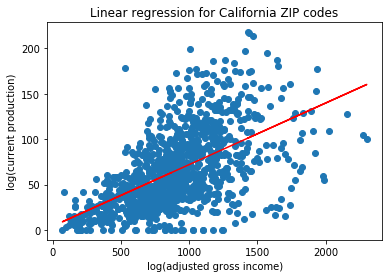

[4.07572408] [[0.067904]]


In [76]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

plt.xlabel('log(adjusted gross income)')
plt.ylabel('log(current production)')
plt.title('Linear regression for California ZIP codes')


plt.savefig('linear_reg_calif.png')
plt.show()

print(lr.intercept_, lr.coef_)

In [64]:

print(lr.score(X, Y), 1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))


0.3081797569506085 0.30752893828358174


In [79]:
sw = ['84790',
'84780',
'84776',
'84770',
'84767',
'84765',
'84764',
'84738',
'84737',
'84664',
'84663',
'84660',
'84606',
'84604',
'84601',
'84536',
'84532',
'84414',
'84405',
'84404',
'84403',
'84401',
'84341',
'84340',
'84335',
'84332',
'84326',
'84322',
'84321',
'84318',
'84315',
'84132',
'84129',
'84128',
'84124',
'84123',
'84121',
'84120',
'84119',
'84118',
'84117',
'84116',
'84115',
'84113',
'84112',
'84111',
'84109',
'84108',
'84107',
'84106',
'84105',
'84104',
'84103',
'84102',
'84101',
'84097',
'84096',
'84095',
'84094',
'84093',
'84092',
'84088',
'84087',
'84084',
'84081',
'84075',
'84070',
'84067',
'84065',
'84062',
'84058',
'84057',
'84056',
'84054',
'84047',
'84044',
'84043',
'84042',
'84041',
'84040',
'84037',
'84025',
'84020',
'84015',
'84014',
'84010',
'84009',
'84006',
'84004',
'84003',
'88063',
'88046',
'88032',
'88012',
'88011',
'88008',
'88007',
'88005',
'88003',
'88001',
'87508',
'87507',
'87506',
'87505',
'87501',
'87402',
'87401',
'87144',
'87124',
'87123',
'87122',
'87121',
'87120',
'87116',
'87114',
'87113',
'87112',
'87111',
'87110',
'87109',
'87108',
'87107',
'87106',
'87105',
'87104',
'87102',
'87068',
'87059',
'87048',
'87047',
'87042',
'87035',
'87031',
'87022',
'87015',
'87008',
'87002',
'89706',
'89705',
'89703',
'89701',
'89557',
'89523',
'89521',
'89519',
'89512',
'89511',
'89510',
'89509',
'89508',
'89506',
'89503',
'89502',
'89501',
'89441',
'89439',
'89436',
'89434',
'89433',
'89431',
'89423',
'89410',
'89403',
'89183',
'89178',
'89169',
'89156',
'89153',
'89152',
'89151',
'89148',
'89147',
'89146',
'89145',
'89144',
'89142',
'89141',
'89139',
'89138',
'89135',
'89134',
'89130',
'89129',
'89128',
'89123',
'89122',
'89121',
'89120',
'89119',
'89118',
'89117',
'89115',
'89113',
'89110',
'89109',
'89108',
'89107',
'89106',
'89104',
'89103',
'89102',
'89101',
'89074',
'89052',
'89032',
'89030',
'89015',
'89014',
'89012',
'89011',
'89005',
'89002',
'81526',
'81521',
'81520',
'81507',
'81506',
'81505',
'81504',
'81503',
'81501',
'81330',
'81008',
'81007',
'81006',
'81005',
'81004',
'81003',
'81001',
'80929',
'80927',
'80925',
'80924',
'80923',
'80922',
'80921',
'80920',
'80919',
'80918',
'80917',
'80916',
'80915',
'80914',
'80913',
'80911',
'80910',
'80909',
'80908',
'80907',
'80906',
'80905',
'80904',
'80903',
'80902',
'80840',
'80829',
'80817',
'80645',
'80642',
'80640',
'80634',
'80631',
'80621',
'80620',
'80603',
'80602',
'80601',
'80550',
'80547',
'80543',
'80538',
'80537',
'80535',
'80534',
'80528',
'80526',
'80525',
'80524',
'80521',
'80516',
'80514',
'80512',
'80503',
'80465',
'80403',
'80401',
'80309',
'80305',
'80304',
'80303',
'80302',
'80301',
'80260',
'80249',
'80247',
'80246',
'80241',
'80239',
'80238',
'80237',
'80236',
'80235',
'80234',
'80233',
'80232',
'80231',
'80230',
'80229',
'80228',
'80227',
'80226',
'80224',
'80223',
'80222',
'80221',
'80220',
'80219',
'80218',
'80216',
'80215',
'80214',
'80212',
'80211',
'80210',
'80209',
'80207',
'80206',
'80205',
'80204',
'80203',
'80202',
'80138',
'80137',
'80134',
'80133',
'80132',
'80130',
'80129',
'80128',
'80127',
'80126',
'80125',
'80124',
'80123',
'80122',
'80121',
'80120',
'80113',
'80112',
'80111',
'80110',
'80108',
'80045',
'80033',
'80031',
'80030',
'80027',
'80026',
'80023',
'80022',
'80021',
'80020',
'80019',
'80018',
'80017',
'80016',
'80015',
'80014',
'80013',
'80012',
'80011',
'80010',
'80007',
'80005',
'80004',
'80003',
'80002',
'96161',
'96087',
'96073',
'96062',
'96019',
'96008',
'96007',
'96003',
'96002',
'96001',
'95993',
'95991',
'95982',
'95973',
'95968',
'95966',
'95965',
'95961',
'95959',
'95953',
'95949',
'95945',
'95938',
'95928',
'95926',
'95917',
'95901',
'95864',
'95843',
'95842',
'95841',
'95838',
'95837',
'95835',
'95834',
'95833',
'95832',
'95831',
'95830',
'95829',
'95828',
'95827',
'95826',
'95825',
'95824',
'95823',
'95822',
'95821',
'95820',
'95819',
'95818',
'95817',
'95816',
'95815',
'95814',
'95811',
'95776',
'95765',
'95762',
'95758',
'95757',
'95747',
'95746',
'95742',
'95722',
'95713',
'95703',
'95695',
'95691',
'95688',
'95687',
'95683',
'95682',
'95678',
'95677',
'95673',
'95672',
'95670',
'95667',
'95663',
'95662',
'95661',
'95660',
'95658',
'95655',
'95652',
'95650',
'95648',
'95630',
'95628',
'95626',
'95624',
'95623',
'95621',
'95620',
'95619',
'95618',
'95616',
'95612',
'95610',
'95608',
'95605',
'95603',
'95602',
'95564',
'95537',
'95521',
'95519',
'95503',
'95501',
'95492',
'95482',
'95476',
'95472',
'95470',
'95452',
'95448',
'95444',
'95442',
'95441',
'95439',
'95436',
'95409',
'95407',
'95405',
'95404',
'95403',
'95401',
'95389',
'95388',
'95382',
'95381',
'95380',
'95368',
'95367',
'95366',
'95361',
'95358',
'95357',
'95356',
'95355',
'95354',
'95351',
'95350',
'95348',
'95343',
'95341',
'95340',
'95337',
'95336',
'95330',
'95328',
'95326',
'95322',
'95320',
'95316',
'95307',
'95301',
'95258',
'95242',
'95240',
'95231',
'95220',
'95219',
'95215',
'95212',
'95211',
'95210',
'95209',
'95207',
'95206',
'95205',
'95204',
'95203',
'95202',
'95190',
'95148',
'95141',
'95140',
'95139',
'95138',
'95136',
'95135',
'95134',
'95133',
'95132',
'95131',
'95130',
'95129',
'95128',
'95127',
'95126',
'95125',
'95124',
'95123',
'95122',
'95121',
'95120',
'95119',
'95118',
'95117',
'95116',
'95113',
'95112',
'95111',
'95110',
'95076',
'95073',
'95070',
'95066',
'95065',
'95064',
'95062',
'95060',
'95054',
'95053',
'95051',
'95050',
'95043',
'95039',
'95037',
'95035',
'95033',
'95032',
'95030',
'95023',
'95020',
'95019',
'95018',
'95014',
'95013',
'95012',
'95010',
'95008',
'95006',
'95005',
'95003',
'95002',
'94965',
'94964',
'94960',
'94957',
'94954',
'94952',
'94951',
'94949',
'94947',
'94945',
'94941',
'94939',
'94931',
'94930',
'94928',
'94925',
'94920',
'94904',
'94903',
'94901',
'94806',
'94805',
'94804',
'94803',
'94801',
'94720',
'94710',
'94709',
'94708',
'94707',
'94706',
'94705',
'94704',
'94703',
'94702',
'94621',
'94619',
'94618',
'94613',
'94612',
'94611',
'94610',
'94609',
'94608',
'94607',
'94606',
'94605',
'94603',
'94602',
'94601',
'94599',
'94598',
'94597',
'94596',
'94595',
'94592',
'94591',
'94590',
'94589',
'94588',
'94587',
'94585',
'94583',
'94582',
'94580',
'94579',
'94578',
'94577',
'94576',
'94574',
'94573',
'94572',
'94569',
'94568',
'94566',
'94565',
'94564',
'94563',
'94561',
'94560',
'94559',
'94558',
'94556',
'94555',
'94553',
'94552',
'94551',
'94550',
'94549',
'94547',
'94546',
'94545',
'94544',
'94542',
'94541',
'94539',
'94538',
'94536',
'94535',
'94534',
'94533',
'94531',
'94530',
'94526',
'94525',
'94523',
'94521',
'94520',
'94519',
'94518',
'94517',
'94516',
'94515',
'94513',
'94510',
'94509',
'94508',
'94507',
'94506',
'94505',
'94503',
'94502',
'94501',
'94497',
'94404',
'94403',
'94402',
'94401',
'94306',
'94305',
'94304',
'94303',
'94301',
'94158',
'94134',
'94133',
'94132',
'94131',
'94130',
'94129',
'94128',
'94127',
'94124',
'94123',
'94122',
'94121',
'94118',
'94117',
'94116',
'94115',
'94114',
'94112',
'94111',
'94110',
'94109',
'94108',
'94107',
'94105',
'94104',
'94103',
'94102',
'94089',
'94087',
'94086',
'94085',
'94080',
'94070',
'94066',
'94065',
'94063',
'94062',
'94061',
'94044',
'94043',
'94041',
'94040',
'94038',
'94037',
'94030',
'94028',
'94027',
'94025',
'94024',
'94022',
'94019',
'94015',
'94014',
'94010',
'94005',
'94002',
'93955',
'93953',
'93950',
'93944',
'93943',
'93940',
'93933',
'93924',
'93923',
'93908',
'93907',
'93906',
'93905',
'93901',
'93888',
'93740',
'93737',
'93730',
'93728',
'93727',
'93726',
'93725',
'93723',
'93722',
'93721',
'93720',
'93711',
'93710',
'93706',
'93705',
'93704',
'93703',
'93702',
'93701',
'93662',
'93657',
'93654',
'93650',
'93648',
'93638',
'93637',
'93636',
'93635',
'93631',
'93625',
'93619',
'93618',
'93616',
'93612',
'93611',
'93599',
'93552',
'93551',
'93550',
'93543',
'93536',
'93535',
'93534',
'93465',
'93458',
'93455',
'93454',
'93449',
'93446',
'93445',
'93444',
'93433',
'93424',
'93422',
'93420',
'93410',
'93407',
'93405',
'93401',
'93314',
'93313',
'93312',
'93311',
'93309',
'93308',
'93307',
'93306',
'93305',
'93304',
'93301',
'93292',
'93291',
'93277',
'93274',
'93267',
'93257',
'93250',
'93247',
'93245',
'93235',
'93230',
'93223',
'93221',
'93215',
'93202',
'93117',
'93111',
'93110',
'93109',
'93108',
'93105',
'93103',
'93101',
'93067',
'93066',
'93065',
'93064',
'93063',
'93060',
'93043',
'93042',
'93041',
'93036',
'93035',
'93033',
'93030',
'93023',
'93022',
'93021',
'93013',
'93012',
'93010',
'93004',
'93003',
'93001',
'92887',
'92886',
'92883',
'92882',
'92881',
'92880',
'92879',
'92870',
'92869',
'92868',
'92867',
'92866',
'92865',
'92861',
'92860',
'92845',
'92844',
'92843',
'92841',
'92840',
'92835',
'92833',
'92832',
'92831',
'92823',
'92821',
'92808',
'92807',
'92806',
'92805',
'92804',
'92802',
'92801',
'92782',
'92780',
'92708',
'92707',
'92706',
'92705',
'92704',
'92703',
'92701',
'92697',
'92694',
'92692',
'92691',
'92688',
'92683',
'92679',
'92677',
'92676',
'92675',
'92673',
'92672',
'92663',
'92662',
'92661',
'92660',
'92657',
'92656',
'92655',
'92653',
'92651',
'92649',
'92648',
'92647',
'92646',
'92637',
'92630',
'92629',
'92627',
'92626',
'92625',
'92624',
'92620',
'92618',
'92617',
'92614',
'92612',
'92610',
'92606',
'92604',
'92603',
'92602',
'92596',
'92595',
'92592',
'92591',
'92590',
'92587',
'92586',
'92585',
'92584',
'92583',
'92582',
'92571',
'92570',
'92567',
'92563',
'92562',
'92557',
'92555',
'92553',
'92551',
'92548',
'92545',
'92544',
'92543',
'92532',
'92530',
'92518',
'92509',
'92508',
'92507',
'92506',
'92505',
'92504',
'92503',
'92501',
'92415',
'92411',
'92410',
'92408',
'92407',
'92405',
'92404',
'92401',
'92399',
'92395',
'92394',
'92392',
'92391',
'92386',
'92378',
'92377',
'92376',
'92374',
'92373',
'92363',
'92359',
'92354',
'92352',
'92350',
'92346',
'92345',
'92344',
'92342',
'92337',
'92336',
'92335',
'92333',
'92325',
'92324',
'92321',
'92320',
'92316',
'92315',
'92314',
'92313',
'92311',
'92308',
'92307',
'92301',
'92283',
'92277',
'92276',
'92274',
'92270',
'92264',
'92262',
'92260',
'92253',
'92251',
'92243',
'92240',
'92236',
'92234',
'92231',
'92223',
'92220',
'92211',
'92210',
'92203',
'92201',
'92182',
'92179',
'92173',
'92161',
'92155',
'92154',
'92147',
'92145',
'92140',
'92139',
'92136',
'92134',
'92131',
'92130',
'92129',
'92128',
'92127',
'92126',
'92124',
'92123',
'92122',
'92121',
'92120',
'92119',
'92118',
'92117',
'92116',
'92115',
'92114',
'92113',
'92111',
'92110',
'92109',
'92108',
'92107',
'92106',
'92105',
'92104',
'92103',
'92102',
'92101',
'92096',
'92093',
'92091',
'92084',
'92083',
'92082',
'92081',
'92078',
'92075',
'92071',
'92069',
'92067',
'92064',
'92059',
'92058',
'92057',
'92056',
'92054',
'92040',
'92037',
'92029',
'92028',
'92027',
'92026',
'92025',
'92024',
'92021',
'92020',
'92019',
'92014',
'92011',
'92010',
'92009',
'92008',
'92007',
'92003',
'91978',
'91977',
'91950',
'91945',
'91942',
'91941',
'91935',
'91932',
'91915',
'91914',
'91913',
'91911',
'91910',
'91902',
'91803',
'91801',
'91792',
'91791',
'91790',
'91789',
'91786',
'91784',
'91780',
'91776',
'91775',
'91773',
'91770',
'91768',
'91767',
'91766',
'91765',
'91764',
'91763',
'91762',
'91761',
'91755',
'91754',
'91752',
'91750',
'91748',
'91746',
'91745',
'91744',
'91741',
'91740',
'91739',
'91737',
'91733',
'91732',
'91731',
'91730',
'91724',
'91723',
'91722',
'91711',
'91710',
'91709',
'91708',
'91706',
'91702',
'91701',
'91607',
'91606',
'91605',
'91604',
'91602',
'91601',
'91521',
'91506',
'91505',
'91504',
'91502',
'91501',
'91436',
'91423',
'91411',
'91406',
'91405',
'91403',
'91402',
'91401',
'91390',
'91387',
'91384',
'91381',
'91377',
'91371',
'91367',
'91364',
'91362',
'91361',
'91360',
'91356',
'91355',
'91354',
'91352',
'91351',
'91350',
'91345',
'91344',
'91343',
'91342',
'91340',
'91335',
'91331',
'91330',
'91326',
'91325',
'91324',
'91321',
'91320',
'91316',
'91311',
'91307',
'91306',
'91304',
'91303',
'91302',
'91301',
'91214',
'91208',
'91207',
'91206',
'91205',
'91204',
'91203',
'91202',
'91201',
'91125',
'91123',
'91108',
'91107',
'91106',
'91105',
'91104',
'91103',
'91101',
'91042',
'91040',
'91030',
'91024',
'91020',
'91016',
'91011',
'91010',
'91008',
'91007',
'91006',
'91001',
'90840',
'90822',
'90815',
'90814',
'90813',
'90810',
'90809',
'90808',
'90807',
'90806',
'90805',
'90804',
'90803',
'90802',
'90755',
'90746',
'90745',
'90744',
'90740',
'90732',
'90731',
'90723',
'90720',
'90717',
'90716',
'90715',
'90713',
'90712',
'90710',
'90706',
'90703',
'90701',
'90680',
'90670',
'90660',
'90650',
'90640',
'90638',
'90631',
'90630',
'90623',
'90621',
'90620',
'90606',
'90605',
'90604',
'90603',
'90602',
'90601',
'90506',
'90505',
'90504',
'90503',
'90502',
'90501',
'90405',
'90404',
'90403',
'90402',
'90401',
'90305',
'90304',
'90303',
'90302',
'90301',
'90293',
'90292',
'90291',
'90290',
'90280',
'90278',
'90277',
'90275',
'90274',
'90272',
'90270',
'90266',
'90265',
'90262',
'90260',
'90255',
'90254',
'90250',
'90249',
'90248',
'90247',
'90245',
'90242',
'90241',
'90240',
'90232',
'90230',
'90222',
'90221',
'90220',
'90212',
'90211',
'90210',
'90201',
'90095',
'90094',
'90089',
'90077',
'90069',
'90068',
'90067',
'90066',
'90065',
'90064',
'90063',
'90062',
'90061',
'90059',
'90058',
'90057',
'90056',
'90052',
'90049',
'90048',
'90047',
'90046',
'90045',
'90044',
'90043',
'90042',
'90041',
'90040',
'90039',
'90038',
'90037',
'90036',
'90035',
'90034',
'90033',
'90032',
'90031',
'90029',
'90028',
'90027',
'90026',
'90025',
'90024',
'90023',
'90022',
'90021',
'90020',
'90019',
'90018',
'90017',
'90016',
'90015',
'90014',
'90013',
'90012',
'90011',
'90010',
'90008',
'90007',
'90006',
'90005',
'90004',
'90003',
'90002',
'90001',
'86406',
'86404',
'86403',
'86351',
'86336',
'86329',
'86327',
'86323',
'86315',
'86314',
'86305',
'86303',
'86301',
'86040',
'86005',
'86004',
'86001',
'85929',
'85901',
'85757',
'85756',
'85755',
'85750',
'85749',
'85748',
'85747',
'85746',
'85745',
'85743',
'85742',
'85741',
'85739',
'85737',
'85735',
'85730',
'85723',
'85721',
'85719',
'85718',
'85716',
'85715',
'85714',
'85713',
'85712',
'85711',
'85710',
'85709',
'85708',
'85707',
'85706',
'85705',
'85704',
'85701',
'85658',
'85648',
'85626',
'85621',
'85607',
'85396',
'85395',
'85392',
'85388',
'85387',
'85383',
'85382',
'85381',
'85379',
'85378',
'85377',
'85375',
'85374',
'85373',
'85367',
'85365',
'85364',
'85363',
'85355',
'85353',
'85351',
'85350',
'85345',
'85340',
'85339',
'85338',
'85335',
'85331',
'85329',
'85326',
'85323',
'85310',
'85309',
'85308',
'85307',
'85306',
'85305',
'85304',
'85303',
'85302',
'85301',
'85298',
'85297',
'85296',
'85295',
'85286',
'85284',
'85283',
'85282',
'85281',
'85268',
'85266',
'85262',
'85260',
'85259',
'85258',
'85257',
'85256',
'85255',
'85254',
'85253',
'85251',
'85250',
'85249',
'85248',
'85234',
'85233',
'85226',
'85225',
'85224',
'85215',
'85213',
'85212',
'85210',
'85209',
'85208',
'85207',
'85206',
'85205',
'85204',
'85203',
'85202',
'85201',
'85143',
'85142',
'85140',
'85132',
'85120',
'85119',
'85118',
'85085',
'85083',
'85054',
'85053',
'85051',
'85050',
'85048',
'85045',
'85044',
'85043',
'85042',
'85041',
'85040',
'85037',
'85035',
'85034',
'85033',
'85032',
'85031',
'85029',
'85028',
'85027',
'85024',
'85023',
'85022',
'85021',
'85020',
'85019',
'85018',
'85017',
'85016',
'85015',
'85014',
'85013',
'85012',
'85009',
'85008',
'85007',
'85006',
'85004',
'85003']

59.03771721903505


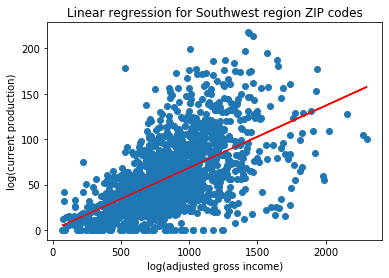

0.3280183510285555 0.32759704591948247
[-0.05805726] [[0.0685366]]


In [80]:
# SW ONLY
swdf = adjusted_gross_income[adjusted_gross_income['region_name'].isin(sw)]
lr = LinearRegression()

X = swdf['log_earning'].values.reshape(-1, 1) # turns them to np.ndarrays
Y = swdf['log_prod'].values.reshape(-1, 1)

lr.fit(X, Y) 
y_pred = lr.predict(X)
print(Y.mean())

plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')

plt.xlabel('log(adjusted gross income)')
plt.ylabel('log(current production)')
plt.title('Linear regression for Southwest region ZIP codes')


plt.savefig('linear_reg_SW.png')
plt.show()

print(lr.score(X, Y), 1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))
print(lr.intercept_, lr.coef_)

15.680579008105715


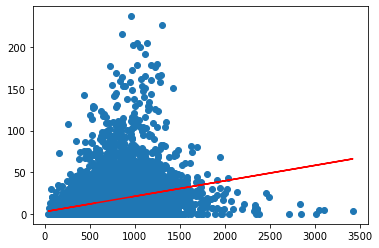

0.08861370864098117 0.08850427224672586


In [45]:
# SW ONLY
notswdf = adjusted_gross_income[~adjusted_gross_income['region_name'].isin(sw)]
lr = LinearRegression()

X = notswdf['log_earning'].values.reshape(-1, 1) # turns them to np.ndarrays
Y = notswdf['log_prod'].values.reshape(-1, 1)

lr.fit(X, Y) 
y_pred = lr.predict(X)
print(Y.mean())

plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
plt.show()

print(lr.score(X, Y), 1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))


NameError: name 'hi_agi' is not defined

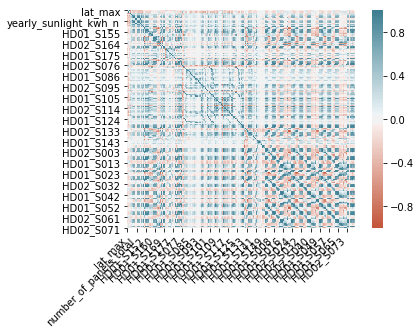

In [25]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);